# Análisis de Datos de Críticas de Películas

### Descripción del Proyecto

Voy a crear un proyecto que recopile críticas de películas desde un sitio web, analice los datos y genere algunos insights útiles. Utilizaré BeautifulSoup para hacer web scraping, pandas para el análisis de datos, y matplotlib para la visualización.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la película:
url = 'https://www.imdb.com/title/tt0111161/reviews'  # Cambia la URL por la de la película que te interese

# Realizamos la solicitud HTTP:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentramos todas las críticas:
reviews = soup.find_all('div', class_='text show-more__control')

# Extraermos el texto de cada crítica:
review_texts = [review.get_text() for review in reviews]

# Creamos un DataFrame con las críticas:
df_reviews = pd.DataFrame(review_texts, columns=['Review'])

# Mostramos las primeras filas del DataFrame:
df_reviews.head()


,Review
0,The Shawshank Redemption is written and direct...
1,It is no wonder that the film has such a high ...
2,I'm trying to save you money; this is the last...
3,"In its Oscar year, Shawshank Redemption (writt..."
4,This movie is not your ordinary Hollywood flic...


### Análisis Básico de Texto

Ahora que tenemos las críticas, hagamos un análisis básico. Por ejemplo, podemos contar la longitud de las críticas y realizar un análisis de frecuencia de palabras.

In [25]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


count      25.000000
mean     1691.280000
std      1437.689858
min        75.000000
25%       876.000000
50%      1091.000000
75%      2367.000000
max      5964.000000
Name: Length, dtype: float64


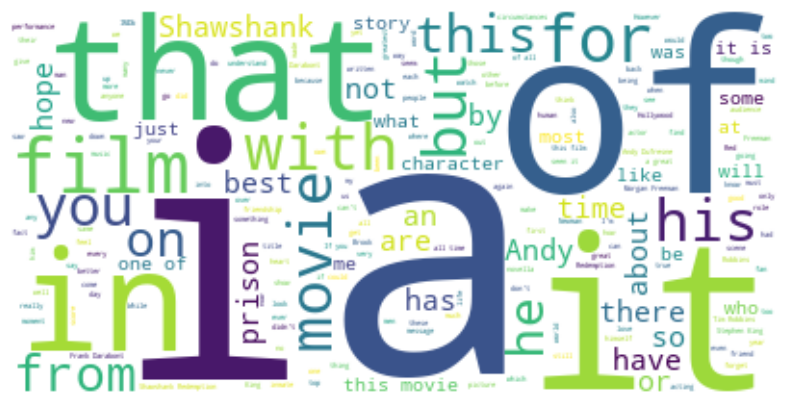

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contamos la longitud de cada crítica:
df_reviews['Length'] = df_reviews['Review'].apply(len)

# Mostramos estadísticas descriptivas:
print(df_reviews['Length'].describe())

# Creamos una nube de palabras:
text = ' '.join(review for review in df_reviews.Review)
wordcloud = WordCloud(stopwords=['the', 'and', 'to'], background_color='white').generate(text)

# Mostramos la nube de palabras:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Visualización de Datos

A continuación generaremos gráficos simples para visualizar la longitud de las críticas

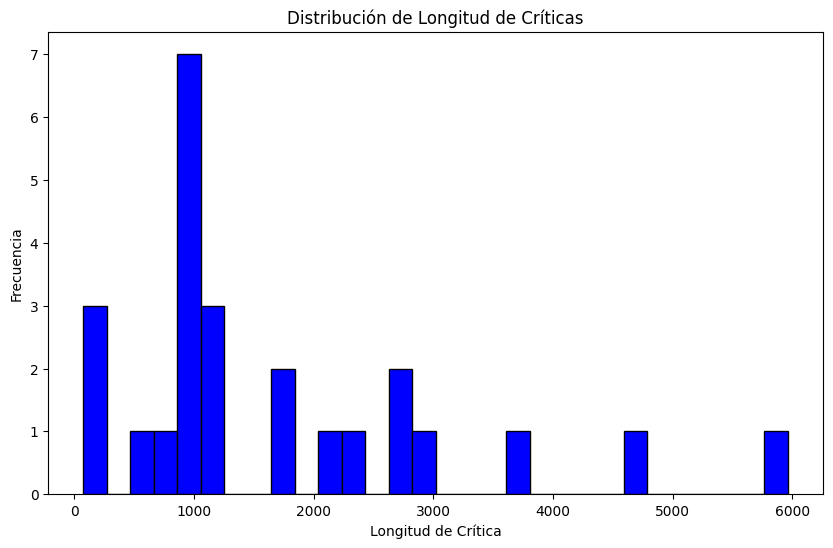

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_reviews['Length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de Longitud de Críticas')
plt.xlabel('Longitud de Crítica')
plt.ylabel('Frecuencia')
plt.show()
